In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# load DATA SET
df = pd.read_csv("./Data/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
num = df.select_dtypes(include="int64").columns
print(num)

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


In [6]:
# for categorical values
cate = df.select_dtypes(include="object").columns

In [7]:
df.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

# Goal: Identify and deal with missing values

In [8]:
df.dropna(thresh=len(df) * 0.5 ,axis=1 , inplace=True)

In [9]:
null_values = (df.isnull().sum()/len(df) * 100).sort_values()
print(null_values)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
Age            19.865320
dtype: float64


# impute with mean 

In [31]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_7308\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [32]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)


In [34]:
df.isnull().sum().sort_values()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Method 2 : Impute Missing values with mode

In [35]:
df_2 = pd.read_csv('./Data/Titanic-Dataset.csv')

In [36]:
df_2.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [37]:
df_2.fillna({'Age' : df_2['Age'].mean()} , inplace=True)

In [38]:
df_2.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Cabin          687
dtype: int64

# impute missing values with mode 
    ` Mode is use for categorical values to impute missing values `

In [53]:
df_2.fillna({'Embarked' : df_2['Embarked'].mode()[0]} , inplace=True)

In [54]:
df_2.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin          687
dtype: int64

# Now we use Advance technique like KNN

In [55]:
from sklearn.impute import KNNImputer

In [67]:
knn = pd.read_csv('./Data/Titanic-Dataset.csv')

In [69]:
knn.dropna(thresh=len(knn) * 0.5 ,axis=1 , inplace=True)

In [70]:
# for categorical values
cate = knn.select_dtypes(include="object").columns

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# apply label encoder

for col in cate:
    df[col] = le.fit_transform(df[col])

In [73]:
imputer = KNNImputer(n_neighbors=3 , weights='distance')
knn_im =imputer.fit_transform(df)

In [75]:
print(knn_im)

[[  1.       0.       3.     ... 523.       7.25     2.    ]
 [  2.       1.       1.     ... 596.      71.2833   0.    ]
 [  3.       1.       3.     ... 669.       7.925    2.    ]
 ...
 [889.       0.       3.     ... 675.      23.45     2.    ]
 [890.       1.       1.     ...   8.      30.       0.    ]
 [891.       0.       3.     ... 466.       7.75     1.    ]]


# Heatmap toi check null values

In [10]:
df = pd.read_csv('./Data/Titanic-Dataset.csv')

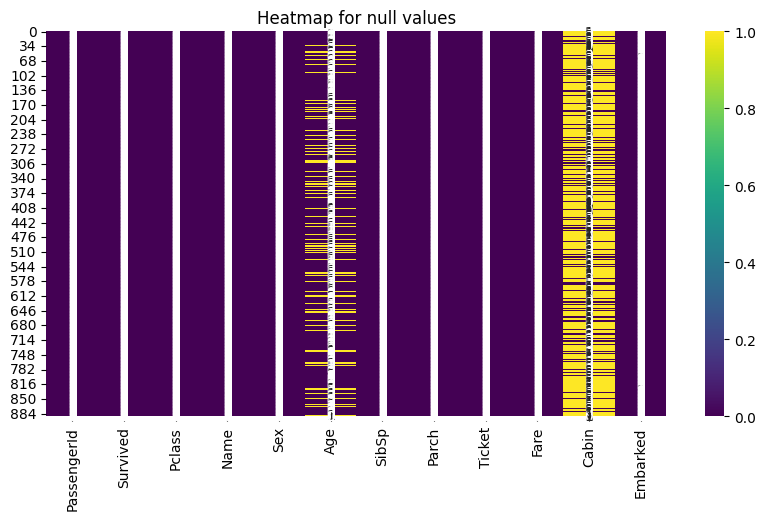

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull()  , cmap='viridis' ,annot=True ,fmt='d')
plt.title("Heatmap for null values")
plt.show()